<a href="https://colab.research.google.com/github/prajo31/Deep-Learning-Papers-Reading-Roadmap/blob/master/Module1_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question 1: [Macro] Average growth of GDP in 2023

In [6]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date
import datetime


In [2]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=19
Period for indexes: 1954-04-19 to 2024-04-19 


##Real Gross Domestic Product(GDPC1)

In [3]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)
gdpc1

,GDPC1
DATE,
1954-07-01,2880.482
1954-10-01,2936.852
1955-01-01,3020.746
1955-04-01,3069.910
1955-07-01,3111.379
...,...
2022-10-01,21989.981
2023-01-01,22112.329
2023-04-01,22225.350


In [4]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1.tail(13)

,GDPC1,gdpc1_us_yoy
DATE,,
2020-10-01,20724.128,-0.010833
2021-01-01,20990.541,0.015726
2021-04-01,21309.544,0.119503
2021-07-01,21483.083,0.047353
2021-10-01,21847.602,0.054211
2022-01-01,21738.871,0.035651
2022-04-01,21708.160,0.018706
2022-07-01,21851.134,0.017132
2022-10-01,21989.981,0.006517


In [5]:
# Find the average growth rate for 2023
gdpc1_2023 = gdpc1[gdpc1.index.year == 2023]
average_growth_2023 = gdpc1_2023['gdpc1_us_yoy'].mean() * 100
# Print the average growth rate
print(f"Average growth rate for 2023: {average_growth_2023:.2f}%")

Average growth rate for 2023: 2.54%


In [6]:
gdpc1_2023

,GDPC1,gdpc1_us_yoy
DATE,,
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


##Question 2. [Macro] Inverse "Treasury Yield"

Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)



In [7]:
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs2, dgs10

(            DGS2
 DATE            
 1976-06-01  7.26
 1976-06-02  7.23
 1976-06-03  7.22
 1976-06-04  7.12
 1976-06-07  7.09
 ...          ...
 2024-04-11  4.93
 2024-04-12  4.88
 2024-04-15  4.93
 2024-04-16  4.97
 2024-04-17  4.93
 
 [12492 rows x 1 columns],
             DGS10
 DATE             
 1962-01-02   4.06
 1962-01-03   4.03
 1962-01-04   3.99
 1962-01-05   4.02
 1962-01-08   4.03
 ...           ...
 2024-04-11   4.56
 2024-04-12   4.50
 2024-04-15   4.63
 2024-04-16   4.67
 2024-04-17   4.59
 
 [16252 rows x 1 columns])

In [8]:
# Join dgs2 and dgs10 on the "date" column
merged_df = dgs2.join(dgs10, how = "inner")
print(merged_df)

            DGS2  DGS10
DATE                   
1976-06-01  7.26   7.94
1976-06-02  7.23   7.94
1976-06-03  7.22   7.92
1976-06-04  7.12   7.89
1976-06-07  7.09   7.88
...          ...    ...
2024-04-11  4.93   4.56
2024-04-12  4.88   4.50
2024-04-15  4.93   4.63
2024-04-16  4.97   4.67
2024-04-17  4.93   4.59

[12492 rows x 2 columns]


In [9]:
merged_df['dgs10-dgs2'] = merged_df['DGS10'] - merged_df['DGS2']
merged_df

,DGS2,DGS10,dgs10-dgs2
DATE,,,
1976-06-01,7.26,7.94,0.68
1976-06-02,7.23,7.94,0.71
1976-06-03,7.22,7.92,0.70
1976-06-04,7.12,7.89,0.77
1976-06-07,7.09,7.88,0.79
...,...,...,...
2024-04-11,4.93,4.56,-0.37
2024-04-12,4.88,4.50,-0.38
2024-04-15,4.93,4.63,-0.30


In [10]:
# Filter data after 2000-01-01
filtered_data = merged_df["2000-01-01":]['dgs10-dgs2']
filtered_data

# Find the minimum value
min_value = round(filtered_data.min(),1)

# Print the minimum value
print(f"Minimum value: {min_value}")

Minimum value: -1.1


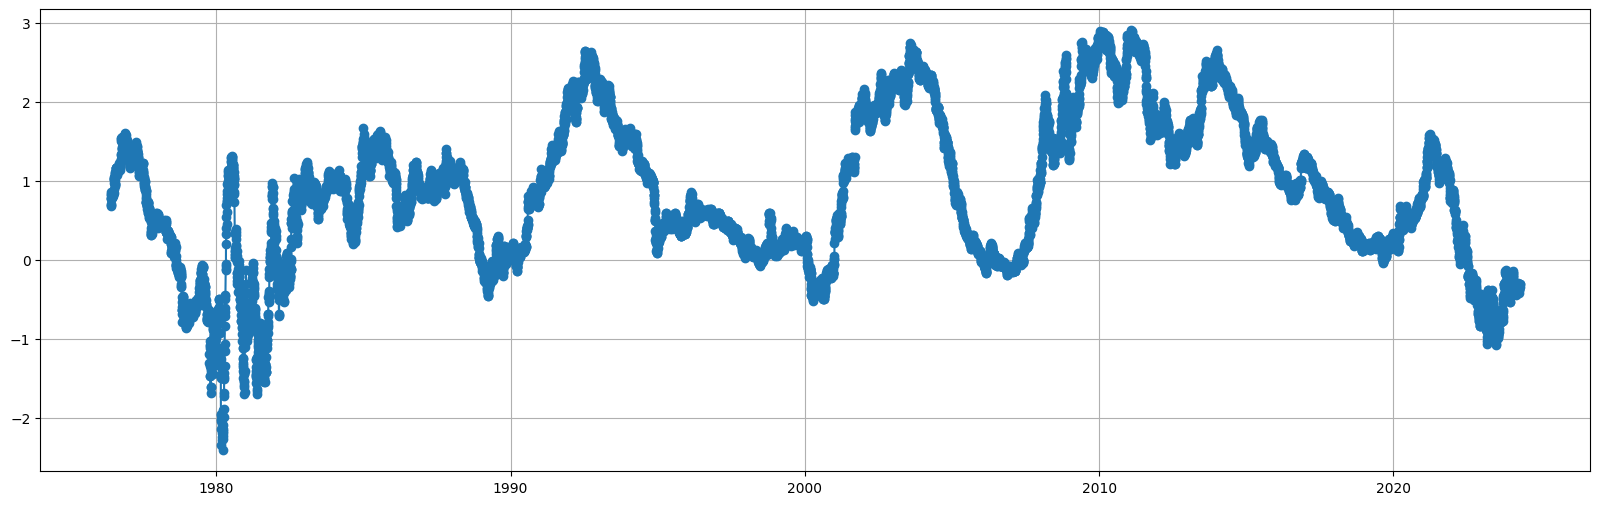

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

ax.plot(merged_df.index, merged_df['dgs10-dgs2'], marker='o', linestyle='-')

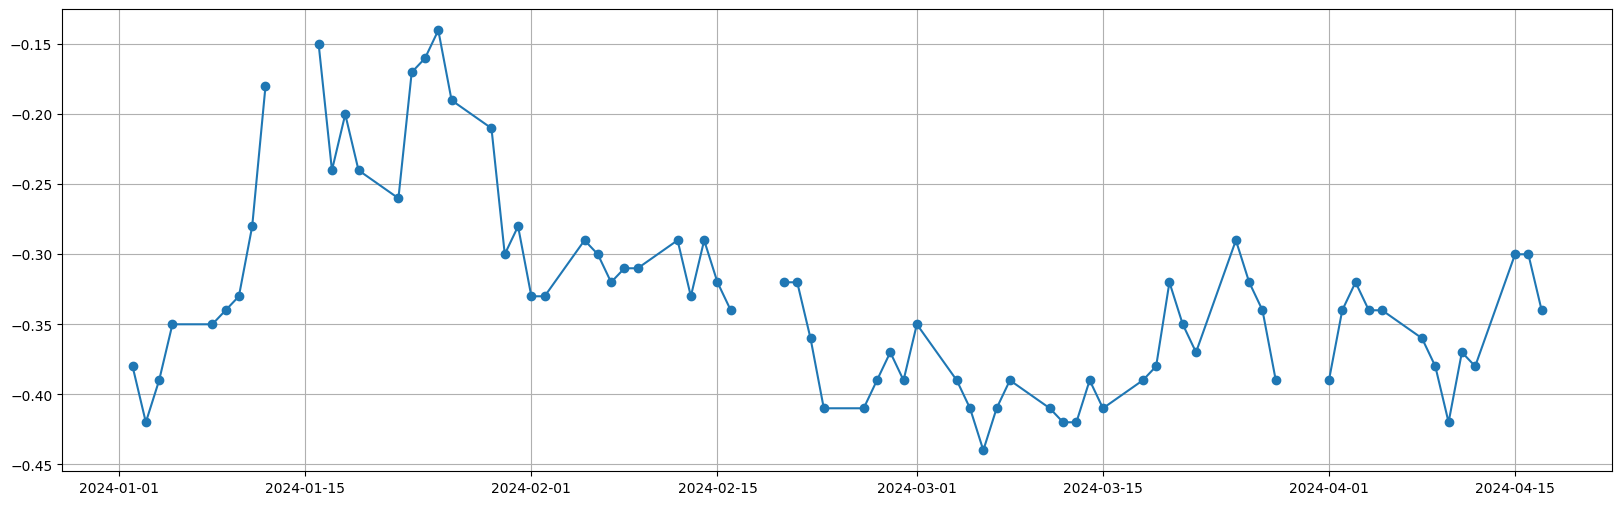

In [12]:
#plotting dgs2-dgs10 for the year 2024 only
year_2024_data = merged_df[merged_df.index.year == 2024]

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

ax.plot(year_2024_data.index, year_2024_data['dgs10-dgs2'], marker='o', linestyle='-')

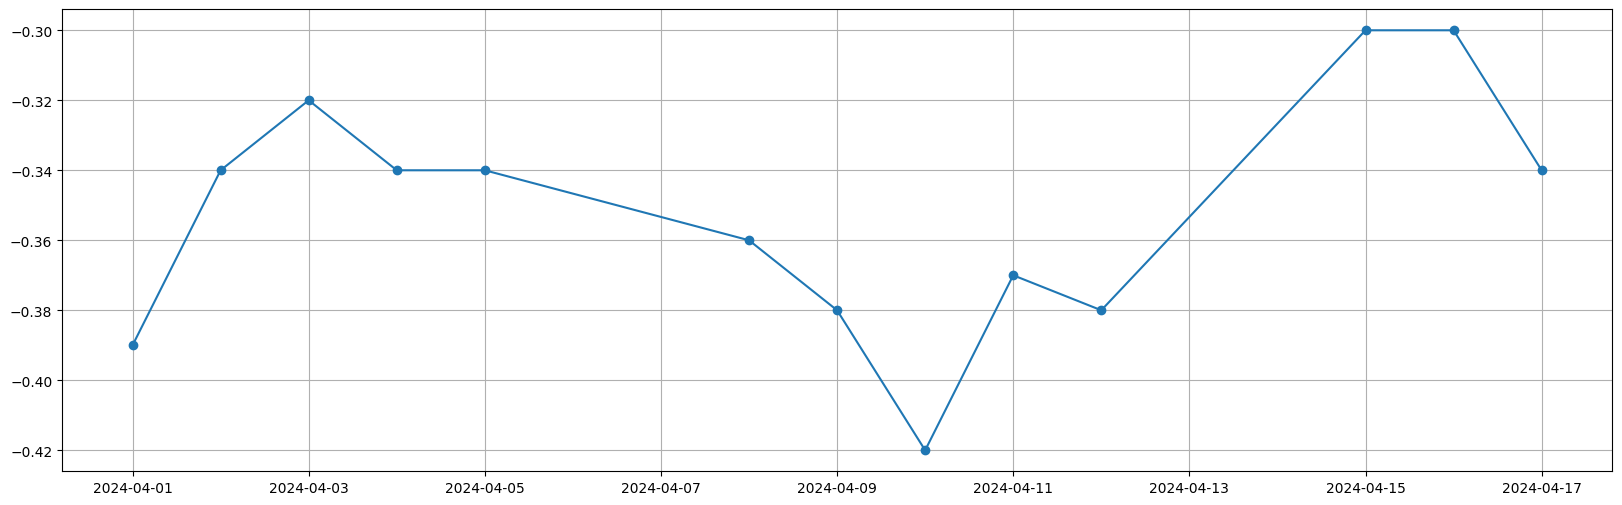

In [13]:
april_2024_data = year_2024_data[year_2024_data.index.month == 4]

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

ax.plot(april_2024_data.index, april_2024_data['dgs10-dgs2'], marker='o', linestyle='-')

##Question 3. [Index] Which Index is better recently?

Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [14]:
import yfinance as yf

# Download the data
sp500 = yf.download("^GSPC", start="2019-04-09", end="2024-04-09")
ipc = yf.download("^MXX", start="2019-04-09", end="2024-04-09")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [15]:
# Calculate the ratio of end to start price for each index
sp500_ratio = sp500["Adj Close"][-1] / sp500["Adj Close"][0]
ipc_ratio = ipc["Adj Close"][-1] / ipc["Adj Close"][0]

# Print the results
print(f"S&P 500 ratio: {sp500_ratio:.4f}")
print(f"IPC Mexico ratio: {ipc_ratio:.4f}")

S&P 500 ratio: 1.8075
IPC Mexico ratio: 1.2843


##Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks

In [16]:
# Import the yfinance library
import yfinance as yf

# Define the list of tickers
tickers = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]

# Define the start and end dates
start_date = "2023-01-01"
end_date = "2023-12-31"

# Download the historical data for each ticker
historical_data = {}
for ticker in tickers:
    historical_data[ticker] = yf.download(ticker, start=start_date, end=end_date)

# Calculate the maximum-minimum "Adj. Close" price for each stock
max_min_prices = {}
for ticker, data in historical_data.items():
    max_close = data["Adj Close"].max()
    min_close = data["Adj Close"].min()
    max_min_prices[ticker] = (max_close - min_close) / max_close

# Print the results
for ticker, value in max_min_prices.items():
    print(f"{ticker}: {value}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

2222.SR: 0.21393070882746015
BRK-B: 0.20775750091289963
AAPL: 0.37244419224463476
MSFT: 0.4242066914981641
GOOG: 0.3924520921912013
JPM: 0.28249929679343244


##Question 5. [Stocks] Dividend Yield

Find the largest dividend yield for the same set of stocks

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximm value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [25]:
# Import the necessary modules
import yfinance as yf

# List of companies
companies = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]

# Initialize an empty dictionary to store results
dividends = {}
closing_prices = {}

# Loop through each company
for company in companies:
    # Download ticker data
    ticker = yf.Ticker(company)

    # Get historical actions
    actions = ticker.actions

    # Filter for dividends in 2023
    dividends_2023 = actions[actions.index.year == 2023]["Dividends"]

    # Sum up all dividends paid in 2023
    total_dividends = dividends_2023.sum()

    # Store the dividends for the current company
    dividends[company] = total_dividends

    # Download historical prices for the last week of 2023
    hist = ticker.history(start="2023-12-25", end="2023-12-31")

    # Extract the closing price
    if 'Adj Close' in hist.columns:
        closing_price = hist['Adj Close'][-1]
    elif 'Close' in hist.columns:
        closing_price = hist['Close'][-1]
    else:
        print(f"No closing price data found for {ticker}")
        continue

    # Store the closing price for the current company
    closing_prices[company] = closing_price

# Calculate the largest dividend yield
max_dividend_yield = 0
max_ticker = ""

for company in companies:
    if company in closing_prices and company in dividends:
        dividend_yield = (dividends[company] / closing_prices[company]) * 100
        if dividend_yield > max_dividend_yield:
            max_dividend_yield = dividend_yield
            max_ticker = company

# Print the largest dividend yield rounded to 1 decimal place
print(f"The largest dividend yield is {round(max_dividend_yield, 1)}% for {max_ticker}")

The largest dividend yield is 2.8% for 2222.SR


##Question 6. [Exploratory] Investigate new metrics
Free text answer

* Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

##Metric 1: Analyst Recommendation:

In [18]:
import yfinance as yf

# List of companies
companies = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]

# Create an empty dictionary to store analyst recommendations
analyst_recommendations = {}

# Loop through each company
for company in companies:
    # Download ticker data
    ticker = yf.Ticker(company)

    # Get analyst recommendations
    recommendations = ticker.recommendations

    # Store recommendations in dictionary
    analyst_recommendations[company] = recommendations

# Print analyst recommendations
for company, recommendations in analyst_recommendations.items():
    print(f"{company}:")
    print(recommendations)
    print()

2222.SR:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          0    0     0     0           0
1    -1m          0    0     0     0           0
2    -2m          0    0     0     0           0
3    -3m          0    0     0     0           0

BRK-B:
  period  strongBuy  buy  hold  sell  strongSell
0     0m          1    3     2     0           0
1    -1m          0    2     2     0           0
2    -2m          0    2     2     0           0
3    -3m          1    1     2     0           0

AAPL:
  period  strongBuy  buy  hold  sell  strongSell
0     0m         11   21     6     0           0
1    -1m         10   17    12     2           0
2    -2m         10   17    12     2           0
3    -3m         10   24     7     1           0

MSFT:
  period  strongBuy  buy  hold  sell  strongSell
0     0m         14   13     6     0           1
1    -1m         23   31     3     0           0
2    -2m         21   30     4     0           0
3    -3m         20   27     6     0  

* **Analyst recommendations**: This metric tracks the recommendations of financial analysts who cover a company. It can be used to gauge market sentiment and identify potential investment opportunities.

##Metric-2: Cash Flow from Operations:


In [32]:
import yfinance as yf

# List of companies
companies = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]

# Create an empty dictionary to store cash flows
companies_cashflows = {}

# Loop through each company
for company in companies:
    # Download ticker data
    ticker = yf.Ticker(company)

    # Get cashflows
    cashflows = ticker.cashflow

    # Store cashflows in dictionary
    companies_cashflows[company] = cashflows

# Print cash flows
for company, cashflows in companies_cashflows.items():
    print(f"{company}:")
    print(cashflows)
    print()

2222.SR:
                                           2023-12-31       2022-12-31  \
Free Cash Flow                         379506000000.0   556991000000.0   
Repurchase Of Capital Stock                       NaN              NaN   
Repayment Of Debt                     -134495000000.0  -132514000000.0   
Issuance Of Debt                        32057000000.0     9082000000.0   
Issuance Of Capital Stock                 662000000.0      550000000.0   
Capital Expenditure                   -158308000000.0  -141161000000.0   
End Cash Position                      198973000000.0   226047000000.0   
Beginning Cash Position                226047000000.0   299579000000.0   
Changes In Cash                        -27074000000.0   -73532000000.0   
Financing Cash Flow                   -510869000000.0  -382675000000.0   
Net Other Financing Charges                       NaN    57895000000.0   
Interest Paid Cff                      -14352000000.0    -9839000000.0   
Cash Dividends Paid          

**Cashflows**: Cash flow from operations shows how much cash a company generates from its core business activities and can be used to assess a company's financial health and stability.

##Metric-3: PE ratios-forward and trailing

In [1]:
import yfinance as yf

# List of companies
companies = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]

# Create an empty dictionary to store PE Ratios
companies_PEs = {}

# Loop through each company
for company in companies:
    # Download ticker data
    ticker = yf.Ticker(company)

    # Get forwardPEs and trailingPEs
    forwardPEs = ticker.info['forwardPE']
    trailingPEs = ticker.info['trailingPE']

    # Store the PE Ratios in dictionary
    companies_PEs[company] = {"forwardPEs": forwardPEs, "trailingPEs": trailingPEs}

# Print PE ratios
for company, company_PEs in companies_PEs.items():
    print(f"{company}:")
    print(company_PEs)
    print()

2222.SR:
{'forwardPEs': 16.25, 'trailingPEs': 15.989305}

BRK-B:
{'forwardPEs': 21.010372, 'trailingPEs': 9.150214}

AAPL:
{'forwardPEs': 23.141655, 'trailingPEs': 25.660965}

MSFT:
{'forwardPEs': 29.874252, 'trailingPEs': 36.02166}

GOOG:
{'forwardPEs': 19.862246, 'trailingPEs': 26.848276}

JPM:
{'forwardPEs': 11.315469, 'trailingPEs': 11.213036}



Why **forward PEs** and **trailing PEs** might be valuable for your project:

- **Identifying undervalued stocks**: By comparing trailing P/Es and forward P/Es, you can identify stocks that are potentially undervalued and have room for growth.

- **Building a diversified portfolio**: Trailing P/Es and forward P/Es can help you build a diversified portfolio by selecting stocks with different valuation metrics.
- **Evaluating investment opportunities:** When evaluating potential investment opportunities, trailing P/Es and forward P/Es can provide valuable insights into a company's current and future valuation.

- **Monitoring your investments:** Tracking trailing P/Es and forward P/Es over time can help you monitor the performance of your investments and make informed decisions about when to buy, sell, or hold.

##Question 7. [Exploratory] Time-driven strategy description around earnings releases
**Free text answer**

* Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

* Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

In [59]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
# Previous week URL
prev_week_url = "https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08"

# This week URL
this_week_url = "https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23"

# Sending requests and extracting tables
prev_week_soup = BeautifulSoup(requests.get(prev_week_url).text)
prev_week_table = prev_week_soup.find('table')

this_week_soup = BeautifulSoup(requests.get(this_week_url).text)
this_week_table = this_week_soup.find('table')

prev_week_df = pd.read_html(str(prev_week_table))[0]
this_week_df = pd.read_html(str(this_week_table))[0]

print("Number of rows in previous week:", len(prev_week_df))
print("Number of rows in this week:", len(this_week_df))

# Compare the DataFrames using the equals() method
data_match = prev_week_df.equals(this_week_df)

# Print the result
if data_match:
    print("The contents of both DataFrames are the same.")
else:
    print("The contents of the DataFrames are different.")


Number of rows in previous week: 100
Number of rows in this week: 100
The contents of both DataFrames are the same.


##Analytical Strategy:
* One potential analytical strategy is to focus on companies with upcoming earnings that have a history of beating earnings estimates. This can be done by analyzing past earnings reports and comparing actual earnings per share (EPS) to consensus estimates. Companies that have a history of beating estimates may be more likely to do so in the future, which could lead to positive stock price movements.